# Pyber Trends
    * The largest number of riders (68%) and drivers (81%) are in urban areas.  The majority of Pyber fares (63%) come from urban riders.
    
    * Average fares in rural areas are the highest.  This could be due to a low supply of drivers, or the distance that needs to be traveled per ride in a rural setting.  Additional data on length of rides could prove helpful for further analysis.
    
    * Average fares for suburban rides are also higher than in urban areas.  30% of total fares are generated by suburban riders, even though suburban drivers only account for 17% of Pybers total driver workforce. This could be a good bang for the buck area to expand operations.
    

In [85]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

# File to Load (Remember to change these)
city_data_to_load = os.path.join("data", "city_data.csv")
ride_data_to_load = os.path.join("data", "ride_data.csv")

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
#print(city_df.head())
#ride_df.head()

# Combine the data into a single dataset
combined_df = pd.merge(ride_df,city_df,how='left', on='city')

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
urban_drivers = combined_df[combined_df["type"]=="Urban"]["driver_count"].sum()
suburban_drivers = combined_df[combined_df["type"]=="Suburban"]["driver_count"].sum()
rural_drivers = combined_df[combined_df["type"]=="Rural"]["driver_count"].sum()
total_drivers = combined_df["driver_count"].sum()
ttl = urban_drivers+suburban_drivers+rural_drivers
urban_pct = urban_drivers/ttl
print(f'Driver count:\nUrban: {urban_drivers}  Suburban: {suburban_drivers} Rural: {rural_drivers}')
print(f'Total from DF {total_drivers}')
print(f'Total from adding {ttl}')
print(f'Urban %: {urban_pct}')

Driver count:
Urban: 59602  Suburban: 8570 Rural: 537
Total from DF 68709
Total from adding 68709
Urban %: 0.8674555007349838


In [8]:
# Create a DF for each city type - rural, suburban, urban
rural_df = combined_df.loc[combined_df["type"] == "Rural"].groupby([combined_df["city"]])
#print(rural_df)
urban_df = combined_df.loc[combined_df["type"] == "Urban"].groupby([combined_df["city"]])
suburban_df = combined_df.loc[combined_df["type"] == "Suburban"].groupby([combined_df["city"]])

## Bubble Plot of Ride Sharing Data

In [10]:
# Obtain the x and y coordinates for each of the three city types
# X is number of rides per city, Y is Average fare     s is number of drivers
x_rural = rural_df['ride_id'].count()
y_rural = rural_df['fare'].mean()
s_rural = rural_df["driver_count"].mean()

# Note to self - stuff below was 1st cut through - was doing groupby on type, then trying to create DFs
#    got suck on getting the type, so started over w/ DFs FOR each type, then groupby
#    Anywhooo, if that works, this can all be removed
#citytype = bycity_df['type']
# Need above 3 data points for each of the 3 city types . . . create DFs for each??
#ridedata_df = pd.DataFrame({"Number of Rides": rides,
 #                          "Average Fare": fare,
  #                         "Number of Drivers:": drivers,
   #                        "Type of City": citytype})
#ridedata_df.head()

# Do x,y & s again for Suburban
x_suburban = suburban_df['ride_id'].count()
y_suburban = suburban_df['fare'].mean()
s_suburban = suburban_df["driver_count"].mean()

# Do it again for Urban
x_urban = urban_df['ride_id'].count()
y_urban = urban_df['fare'].mean()
s_urban = urban_df["driver_count"].mean()


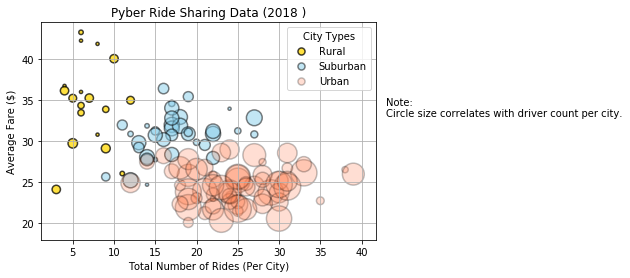

In [44]:
# Build the scatter plots for each city type
plt.scatter(x_rural, y_rural, s=s_rural*10, c="gold", alpha=.75, label="Rural", linewidths=1.5, edgecolor="black")
plt.scatter(x_suburban, y_suburban, s=s_suburban*10, c="skyblue", alpha=.5, label="Suburban", linewidths=1.5, edgecolor="black")
plt.scatter(x_urban, y_urban, s=s_urban*10, c="coral", alpha=.25, label="Urban", linewidths=1.5, edgecolor="black")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2018 )")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend   
# Getting the dots the same size - (see stackoverflow.com/questions/24706125/setting-a-fixed-size-for-points-in-legend)
lgnd = plt.legend(loc="best", title="City Types", scatteryoffsets=[0.5])
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
plt.text(43,33,'Note:\nCircle size correlates with driver count per city.')

# Save Figure
# Note to self - this needs to go in same cell where plotting, otherwise i get a blank png file.
plt.savefig("data/Pyber_bubble.png")

#plt.scatter?
#plt.legend?

In [36]:
# Show plot
plt.show()


## Total Fares by City Type

In [41]:
# DF by type to use for the pie charts
bycitytype_df = combined_df.groupby('type')
fares = bycitytype_df['fare'].sum()
fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

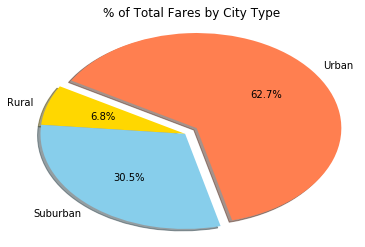

In [86]:
# Calculate Type Percents
#city_type = combined_df["type"].unique()
city_type = ["Rural", "Suburban", "Urban"]
fares = bycitytype_df['fare'].sum()

# Build Pie Chart
colors = ["gold", "skyblue", "coral"]
explode = (0,0,0.1)
plt.pie(fares, explode=explode, labels=city_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
#plt.axis("equal")
plt.axis("auto")

# Save Figure
plt.savefig("data/Pyber_Fares_by_City_Type.png")


In [40]:
# Show Figure - don't really need in Jupyter with %matplotlib inline at top.  AND seems to have messed up my bubble plot save.
#plt.show()

## Total Rides by City Type

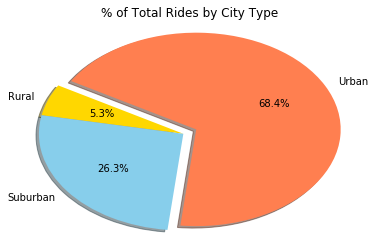

In [87]:
# Calculate Ride Percents
city_type = ["Rural", "Suburban", "Urban"]
rides = bycitytype_df['ride_id'].count()

# Build Pie Chart
colors = ["gold", "skyblue", "coral"]
explode = (0,0,0.1)
plt.pie(rides, explode=explode, labels=city_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
plt.axis("auto")

# Save Figure
plt.savefig("data/Pyber_Rides_by_City_Type.png")

In [ ]:
# Show Figure - don't really need in Jupyter with %matplotlib inline at top.  AND seems to have messed up my bubble plot save.
#plt.show()

## Total Drivers by City Type

In [66]:
#bycity_df = combined_df.groupby("city")
#drivers = combined_df.groupby(['type','city']).groups.sum('driver_count')
#drivers = bycitytype_df["driver_count"].mean()
#drivers = combined_df.groupby(["type"])["driver_count"].sum()
#bycitytype_df["driver_count"].sum().reset_index()
drivers = city_df.groupby("type")["driver_count"].sum()

print(drivers)

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64


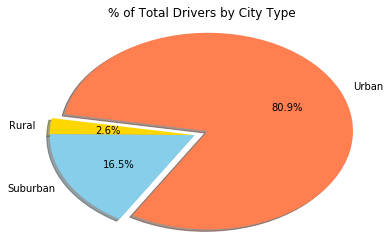

In [88]:
# Calculate Driver Percents
city_type = ["Rural", "Suburban", "Urban"]
drivers = city_df.groupby("type")["driver_count"].sum()

# Build Pie Chart
colors = ["gold", "skyblue", "coral"]
explode = (0,0,0.1)
plt.pie(drivers, explode=explode, labels=city_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=170)
plt.title("% of Total Drivers by City Type")
plt.axis("auto")

# Save Figure
plt.savefig("data/Pyber_Drivers_by_City_Type.png")

In [ ]:
# Show Figure - don't really need in Jupyter with %matplotlib inline at top.  
#plt.show()